In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
tele_df = pd.read_csv("TeleCom_Data-1.csv")
tele_df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
1,"56;""services"";""married"";""high.school"";""no"";""no..."
2,"45;""services"";""married"";""basic.9y"";""unknown"";""..."
3,"59;""admin."";""married"";""professional.course"";""n..."
4,"41;""blue-collar"";""married"";""unknown"";""unknown""..."
...,...
41175,"29;""unemployed"";""single"";""basic.4y"";""no"";""yes""..."
41176,"73;""retired"";""married"";""professional.course"";""..."
41177,"46;""blue-collar"";""married"";""professional.cours..."
41178,"56;""retired"";""married"";""university.degree"";""no..."


In [3]:
tele_df = pd.read_csv("TeleCom_Data-1.csv",sep=';',quoting=3)
tele_df.head(10)

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""housing""""","""""loan""""","""""contact""""","""""month""""","""""day_of_week""""",...,"""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""emp.var.rate""""","""""cons.price.idx""""","""""cons.conf.idx""""","""""euribor3m""""","""""nr.employed""""","""""y"""""""
0,"""40","""""admin.""""","""""married""""","""""basic.6y""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
1,"""56","""""services""""","""""married""""","""""high.school""""","""""no""""","""""no""""","""""yes""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
2,"""45","""""services""""","""""married""""","""""basic.9y""""","""""unknown""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
3,"""59","""""admin.""""","""""married""""","""""professional.course""""","""""no""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
4,"""41","""""blue-collar""""","""""married""""","""""unknown""""","""""unknown""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
5,"""24","""""technician""""","""""single""""","""""professional.course""""","""""no""""","""""yes""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
6,"""25","""""services""""","""""single""""","""""high.school""""","""""no""""","""""yes""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
7,"""41","""""blue-collar""""","""""married""""","""""unknown""""","""""unknown""""","""""no""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
8,"""25","""""services""""","""""single""""","""""high.school""""","""""no""""","""""yes""""","""""no""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
9,"""29","""""blue-collar""""","""""single""""","""""high.school""""","""""no""""","""""no""""","""""yes""""","""""telephone""""","""""may""""","""""mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""


In [4]:
# Remove quote characters 
tele_df = tele_df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)
tele_df.columns = tele_df.columns.map(lambda x: x.strip('"') if isinstance(x, str) else x)
tele_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
tele_df["duration"]

0        151
1        307
2        198
3        139
4        217
        ... 
41175    112
41176    334
41177    383
41178    189
41179    442
Name: duration, Length: 41180, dtype: int64

In [4]:
from ydata_profiling import ProfileReport
dataOverview = ProfileReport(tele_df,title="EDA TeleCommunication")
# dataOverview.to_widgets()

In [ ]:
dataOverview.to_html()

In [6]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  object 
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [7]:
tele_df["age"] = tele_df["age"].astype("int64")
tele_df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41180 entries, 0 to 41179
Series name: age
Non-Null Count  Dtype
--------------  -----
41180 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB


In [7]:
tele_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41180.0,40.021710,10.419593,17.000,32.000,38.000,47.000,98.000
duration,41180.0,258.280427,259.299856,0.000,102.000,180.000,319.000,4918.000
campaign,41180.0,2.567800,2.770225,1.000,1.000,2.000,3.000,56.000
pdays,41180.0,962.516707,186.809028,0.000,999.000,999.000,999.000,999.000
previous,41180.0,0.172705,0.493719,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41180.0,0.081901,1.571037,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41180.0,93.575508,0.578762,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41180.0,-40.501999,4.627358,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41180.0,3.621422,1.734385,0.634,1.344,4.857,4.961,5.045
nr.employed,41180.0,5167.053344,72.230334,4963.600,5099.100,5191.000,5228.100,5228.100


Get the **Duplicated** total based on rows

In [8]:
tele_df.duplicated().sum()

12

Get the **Unique** count for each columns data

In [9]:
tele_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Job based Unique values and Column Data description

In [9]:
job_unique = tele_df["job"].unique()
print(job_unique)
tele_df["job"].describe()

['admin.' 'services' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


count      41180
unique        12
top       admin.
freq       10422
Name: job, dtype: object

**Y** Column with "Yes/No" value denotes if the customer subscribed to the new plan or Not and here's the overview of that column

In [10]:
#unique values
y_unique = tele_df["y"].unique()
print(y_unique) 
print(tele_df["y"].isnull().sum()) #If null values
tele_df["y"].describe()

['no' 'yes']
0


count     41180
unique        2
top          no
freq      36542
Name: y, dtype: object

In [14]:
tele_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
tele_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
tele_df.dtypes

age                 int16
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [16]:
subscribedP = tele_df[tele_df["y"] == "yes"]
# print(subscribedP)
subscribedP.count()

age               4638
job               4638
marital           4638
education         4638
default           4638
housing           4638
loan              4638
contact           4638
month             4638
day_of_week       4638
duration          4638
campaign          4638
pdays             4638
previous          4638
poutcome          4638
emp.var.rate      4638
cons.price.idx    4638
cons.conf.idx     4638
euribor3m         4638
nr.employed       4638
y                 4638
dtype: int64

In [17]:
tele_df[tele_df["y"] == "no"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41172,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


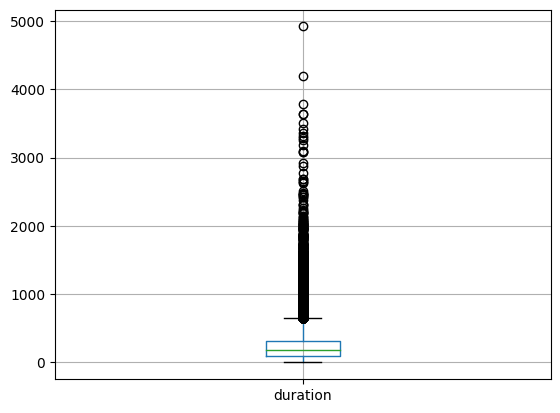

In [10]:
tele_df[['duration']].boxplot()
plt.show()

In [11]:
cat_cols=tele_df.select_dtypes(include=['object']).columns
num_cols = tele_df.select_dtypes(include=['int64','int16','float64']).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Numerical Variables:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


age
Skew : 0.78


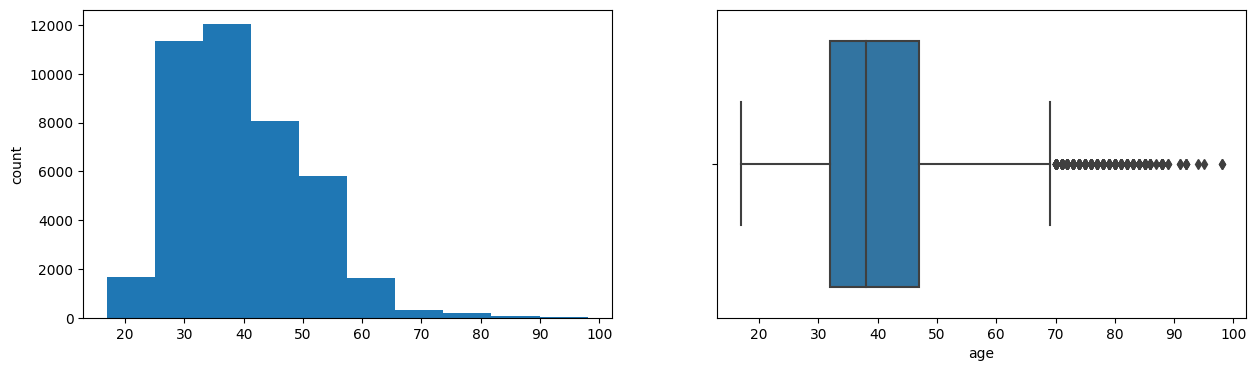

duration
Skew : 3.26


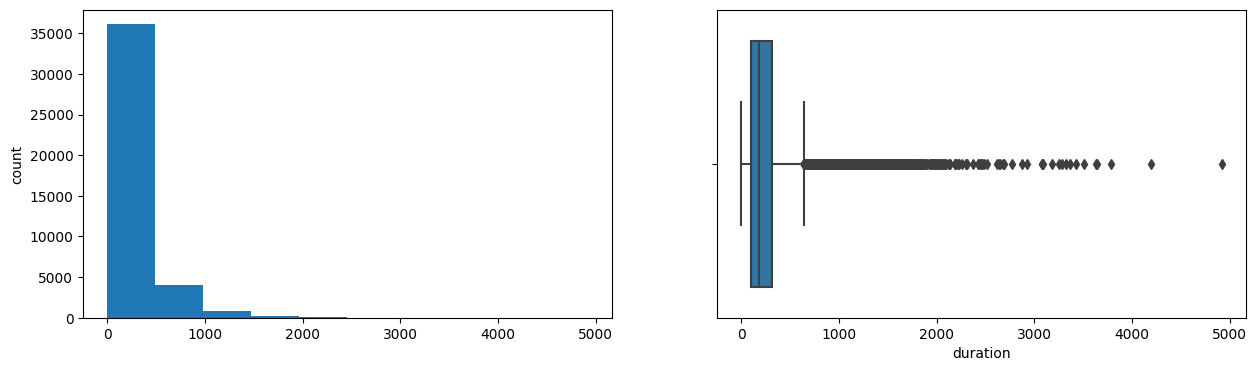

campaign
Skew : 4.76


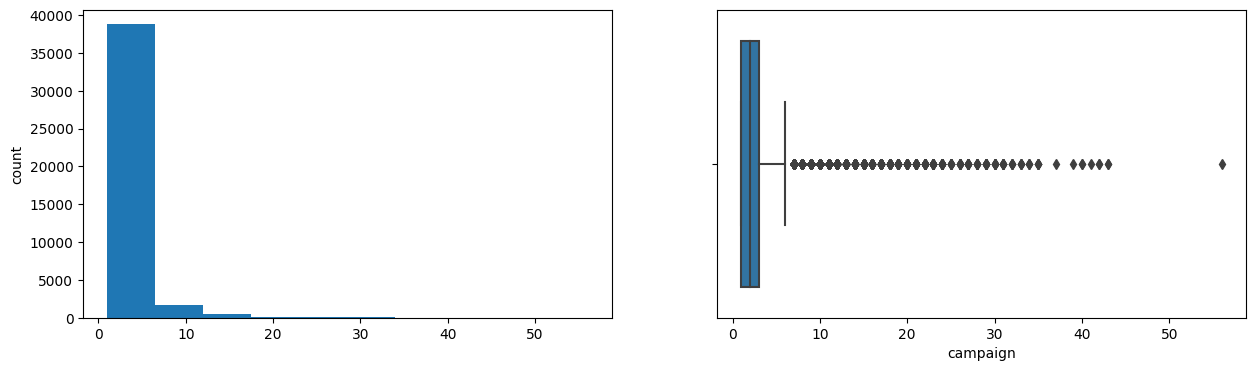

pdays
Skew : -4.93


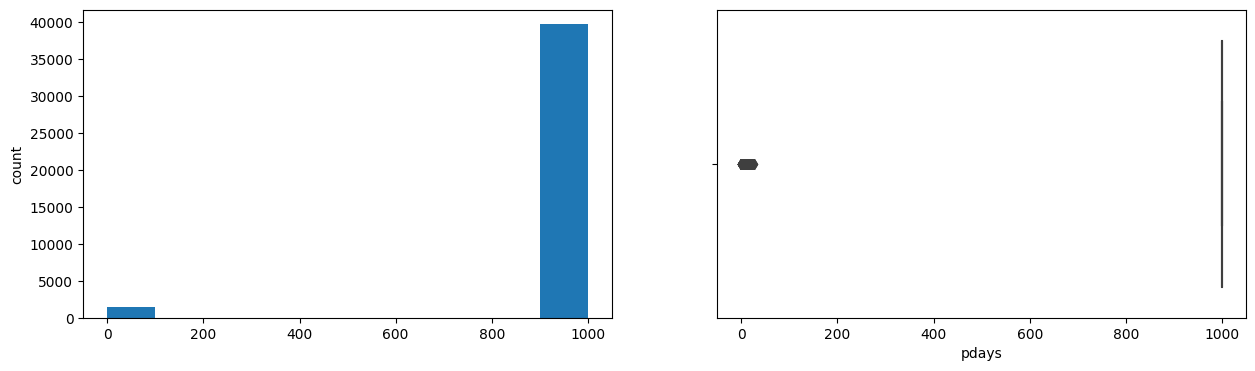

previous
Skew : 3.81


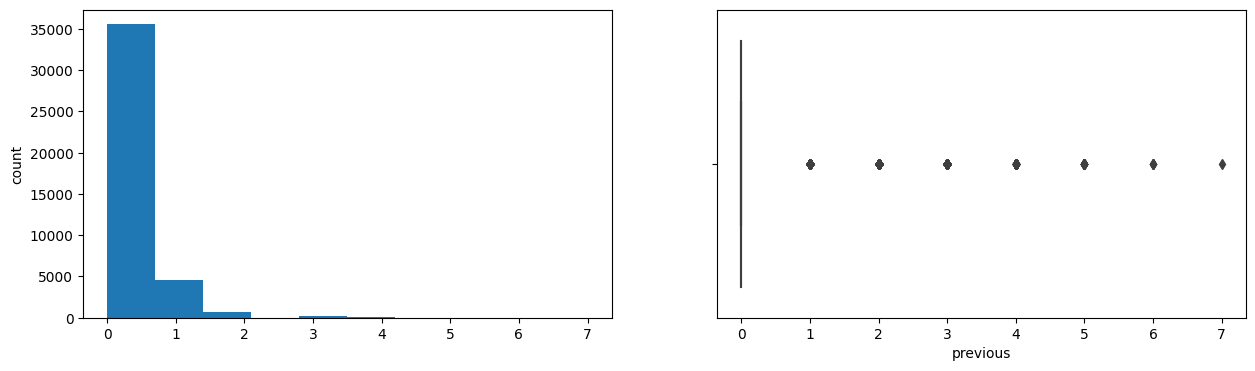

emp.var.rate
Skew : -0.72


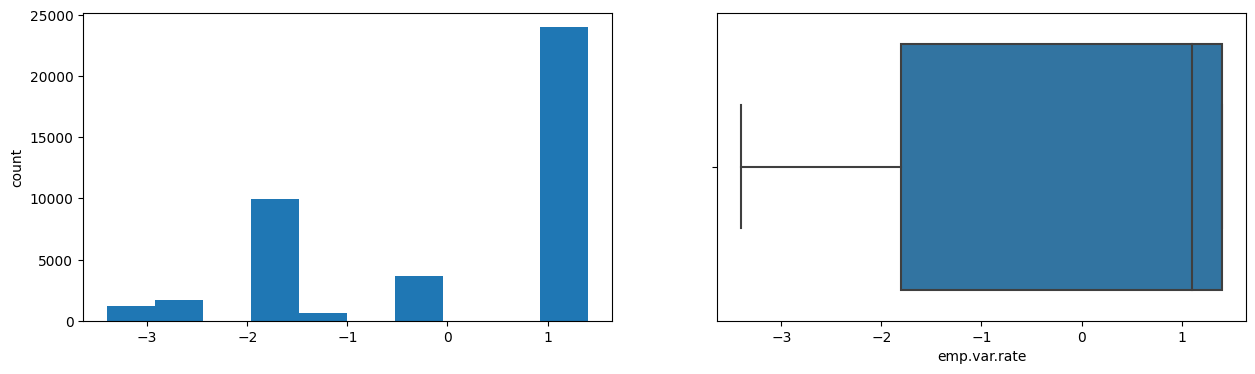

cons.price.idx
Skew : -0.23


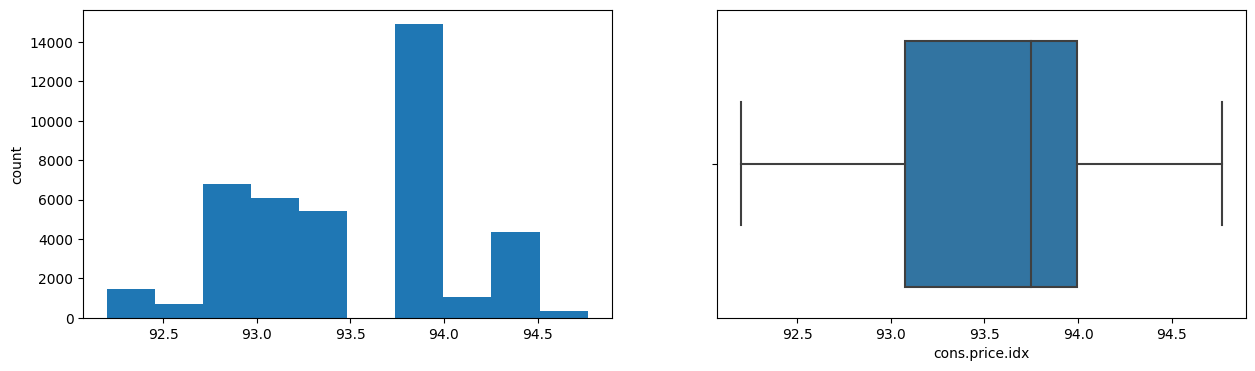

cons.conf.idx
Skew : 0.3


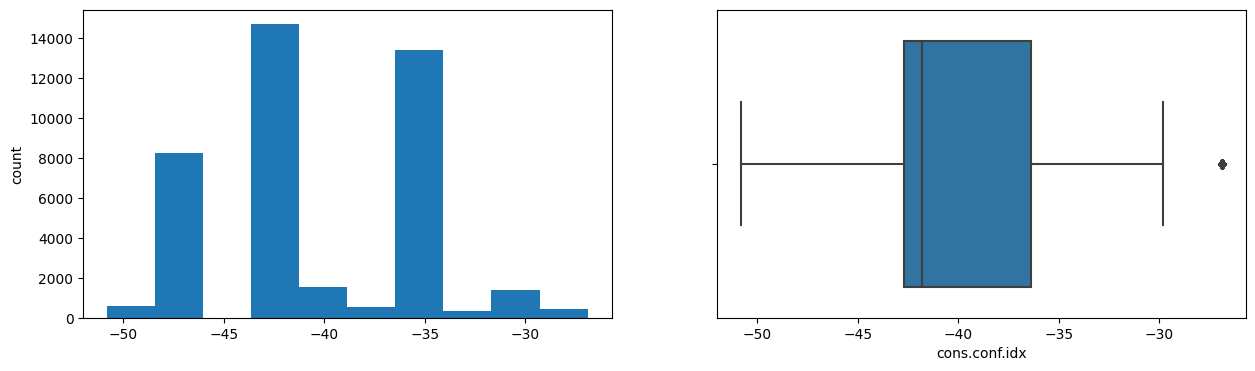

euribor3m
Skew : -0.71


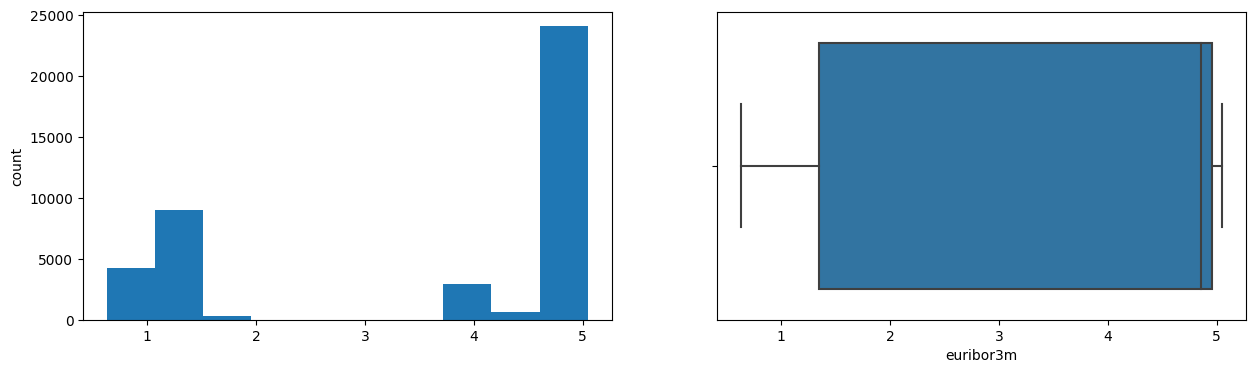

nr.employed
Skew : -1.04


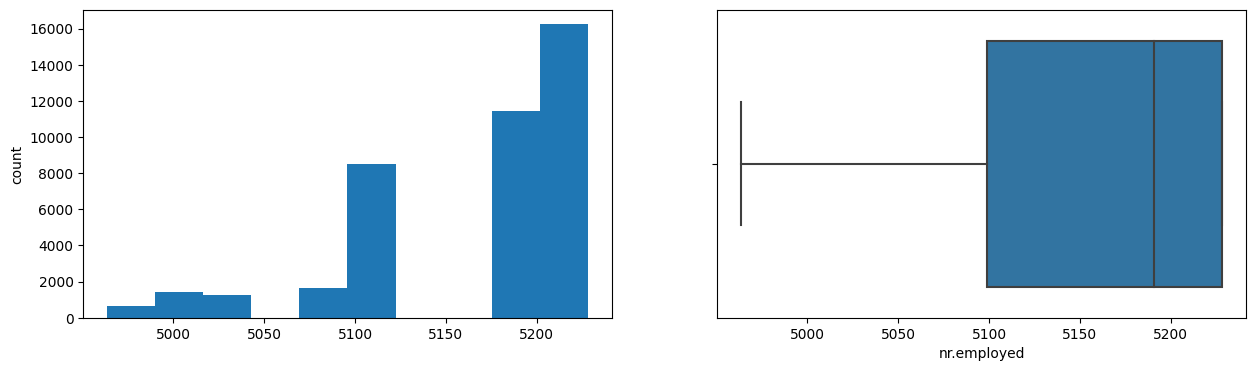

In [25]:
for col in num_cols:
    print(col)
    print('Skew :', round(tele_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    tele_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=tele_df[col])
    plt.show()

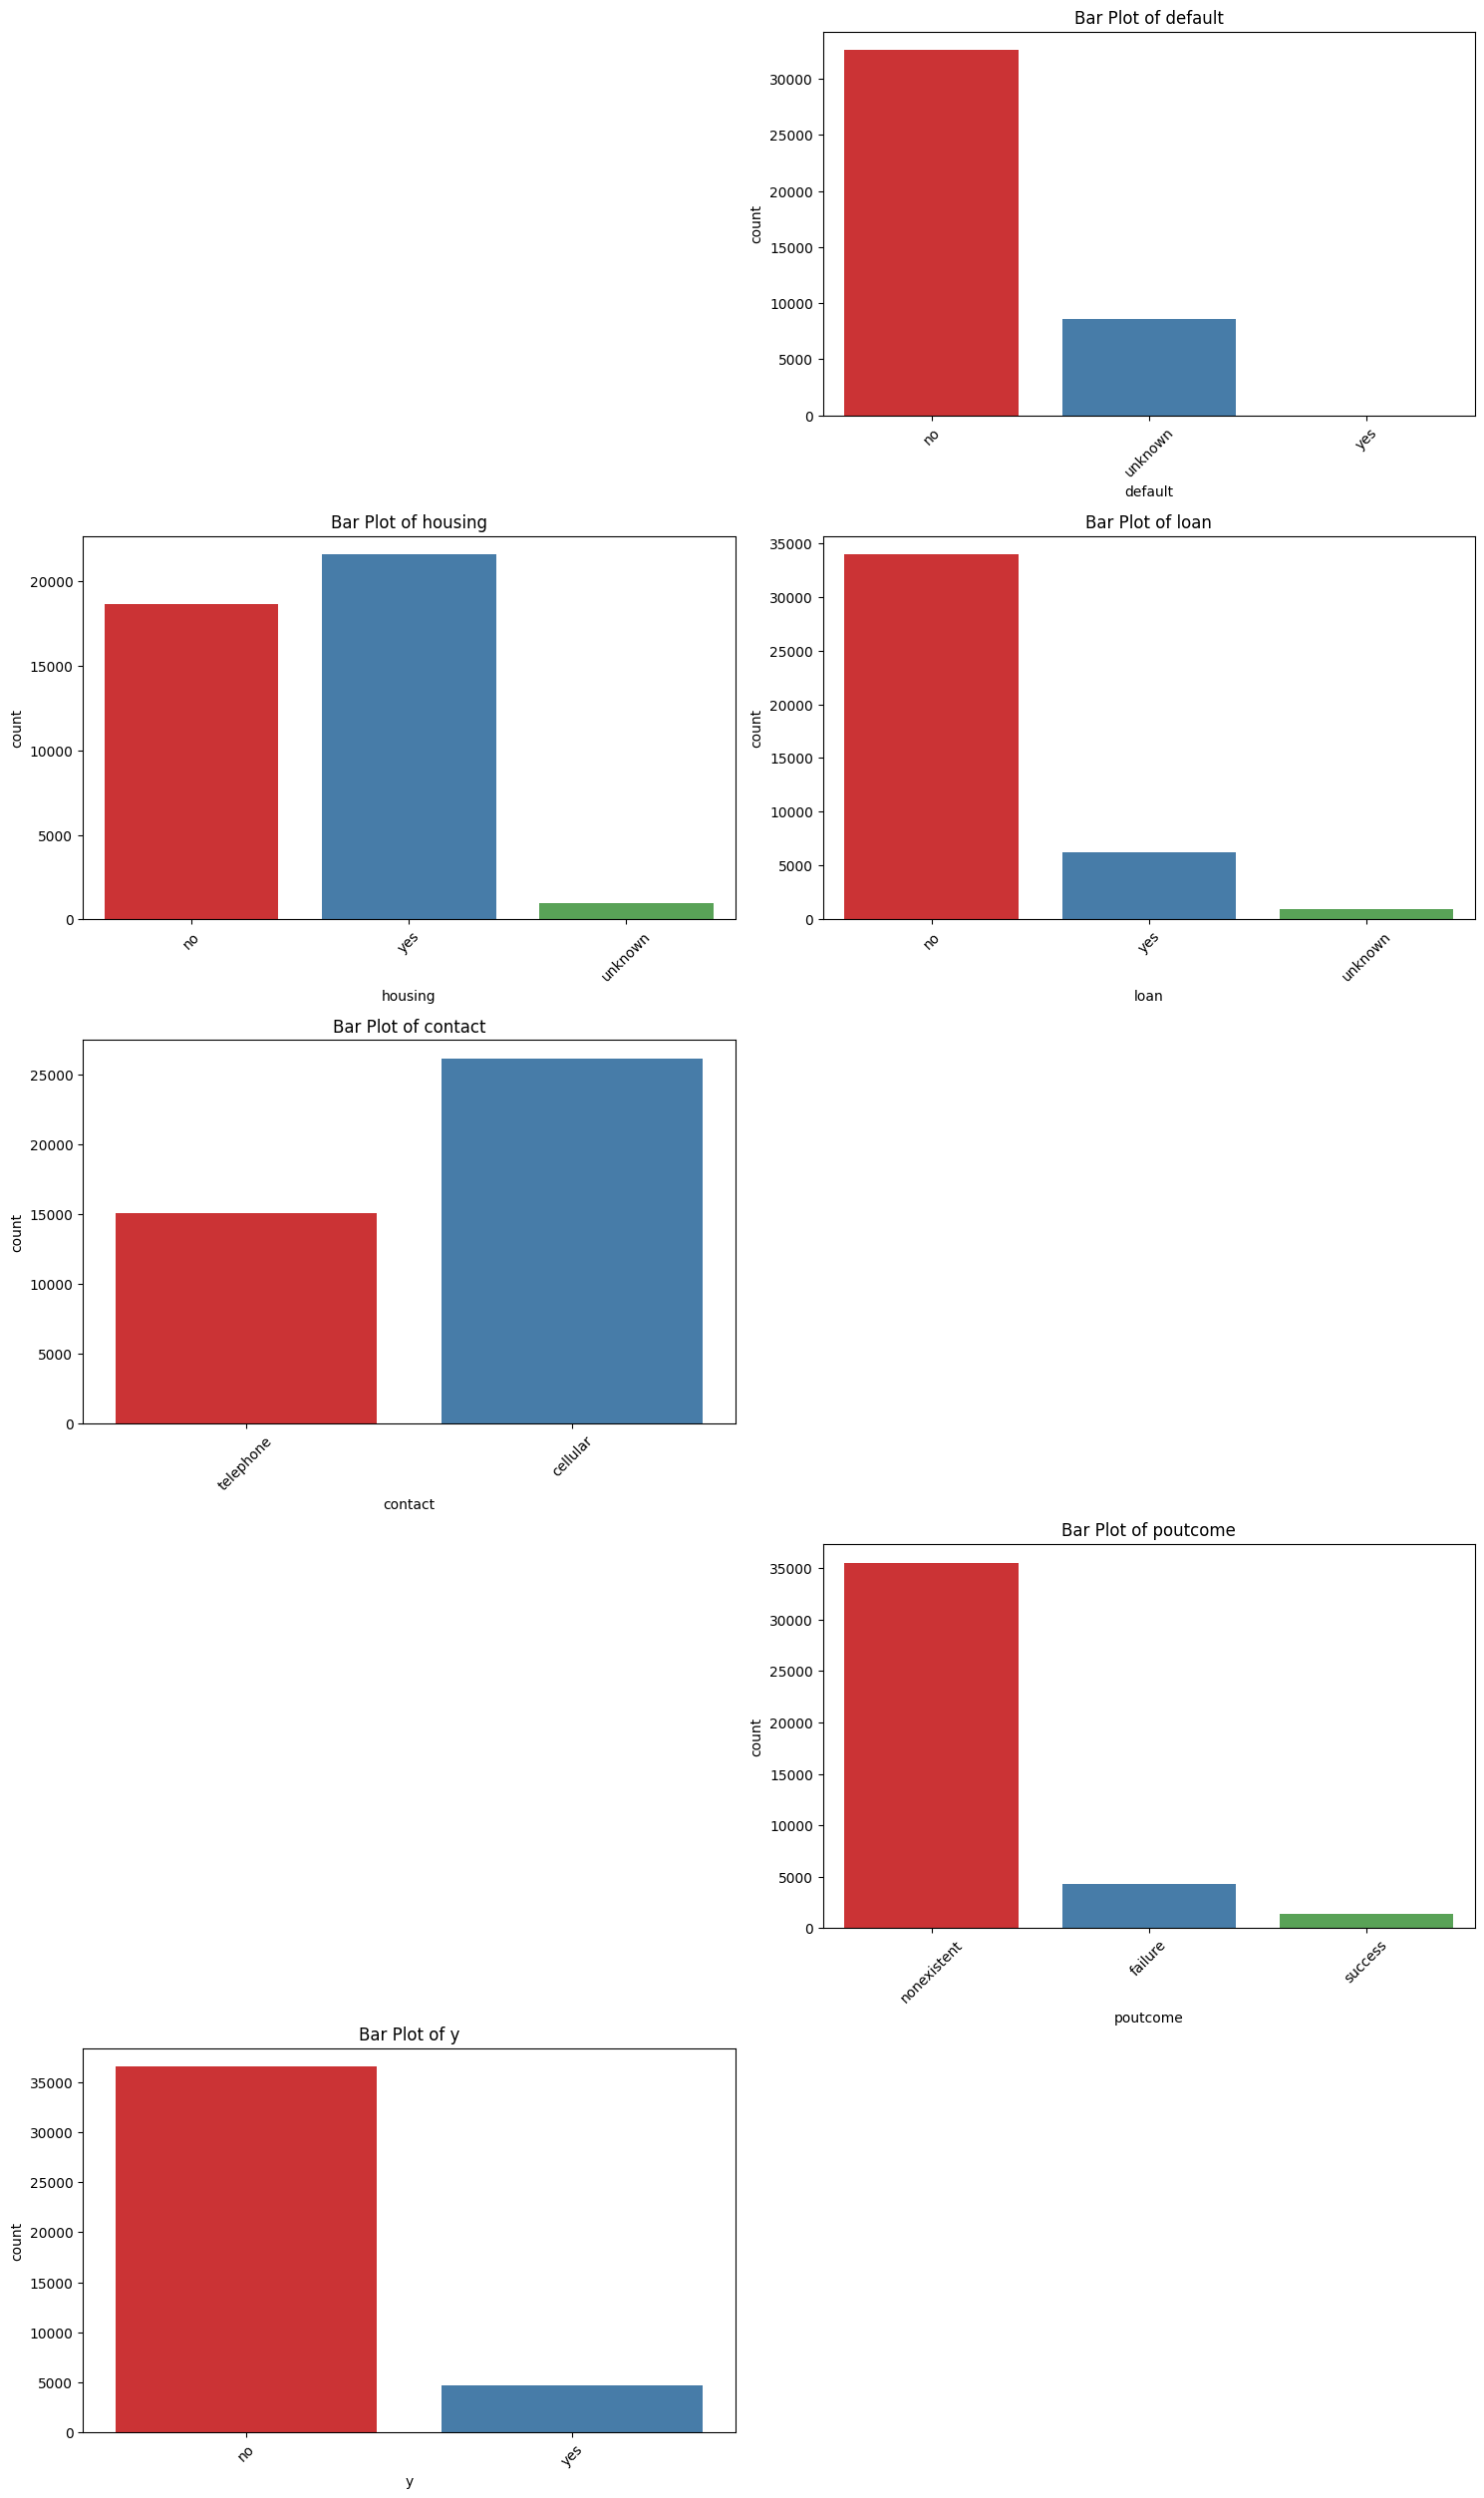

In [36]:
# Set the figure size to accommodate all plots
plt.figure(figsize=(15, 30))

# Loop through each categorical column and create a bar plot
for i, column in enumerate(cat_cols):
    if len(tele_df[column].value_counts()) < 4:
        plt.subplot(6, 2, i + 1)  # Create a subplot for each column
        sns.countplot(x=column, data=tele_df, palette='Set1')  # Create the countplot
        plt.title(f'Bar Plot of {column}')  # Set the title for the plot
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


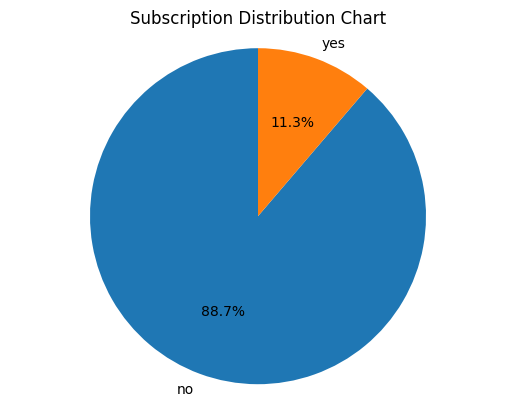

In [16]:
subscribed_vals = tele_df['y'].value_counts()  
plt.pie( subscribed_vals,labels=subscribed_vals.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Distribution Chart')  
plt.axis('equal')  
plt.show()

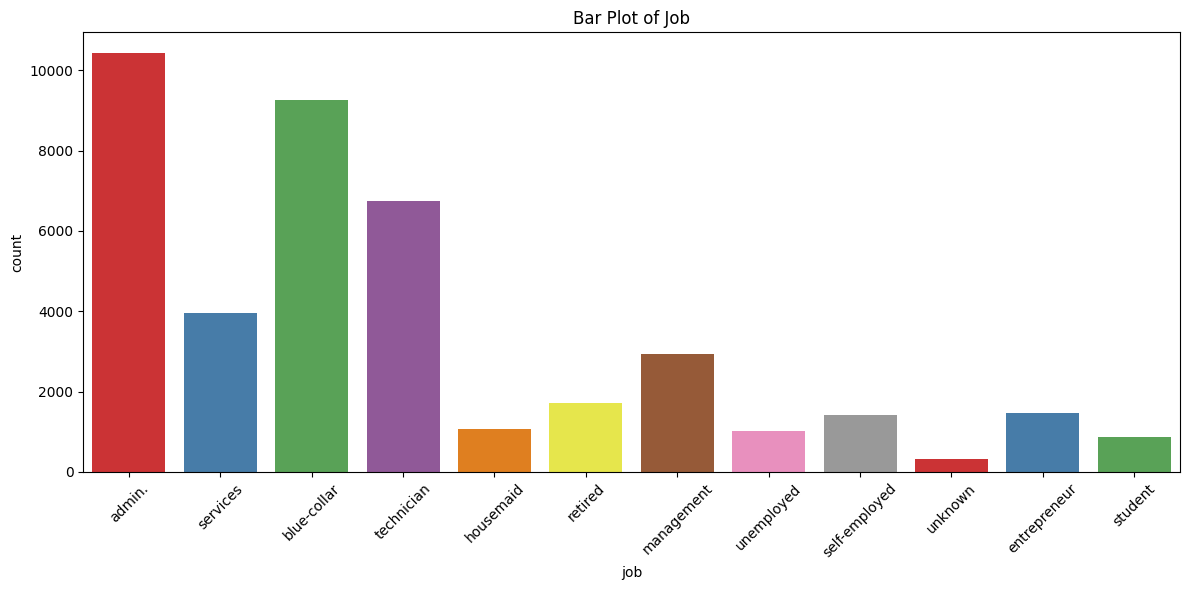

In [40]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='job', data=tele_df, palette='Set1')  
plt.title('Bar Plot of Job')  
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

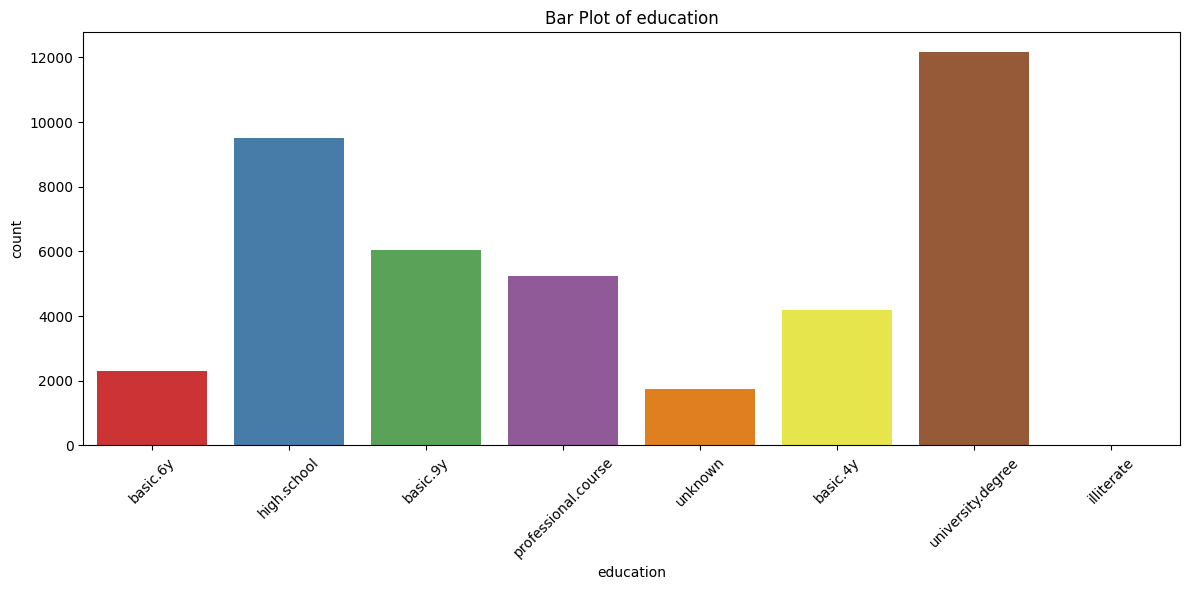

In [42]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='education', data=tele_df, palette='Set1')  
plt.title('Bar Plot of education')  
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

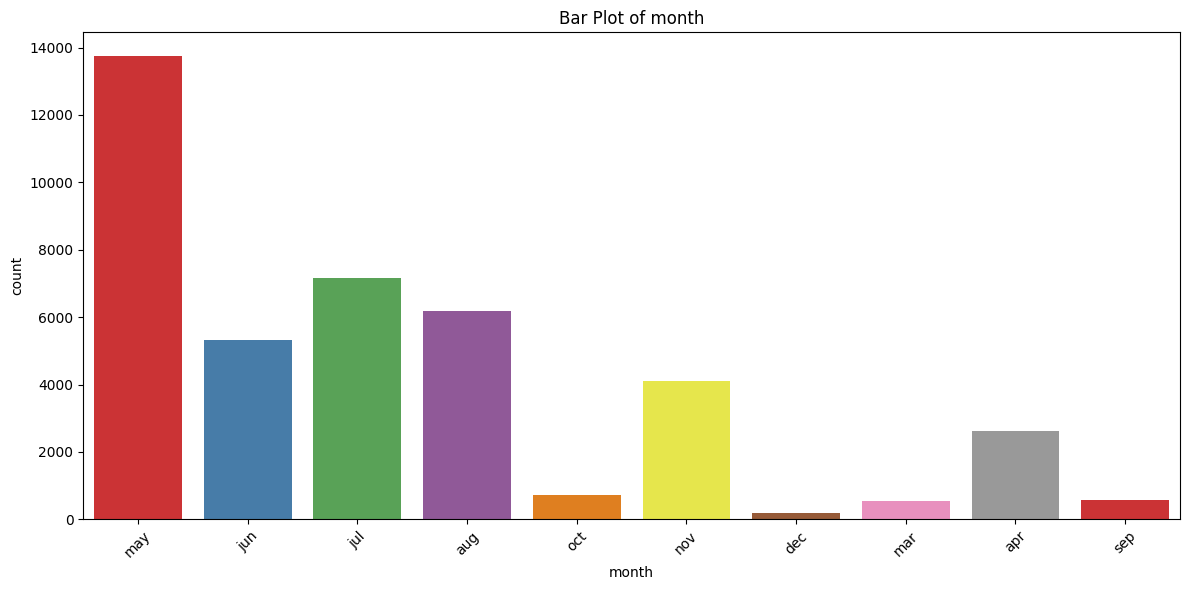

In [44]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='month', data=tele_df, palette='Set1')  
plt.title('Bar Plot of month')  
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

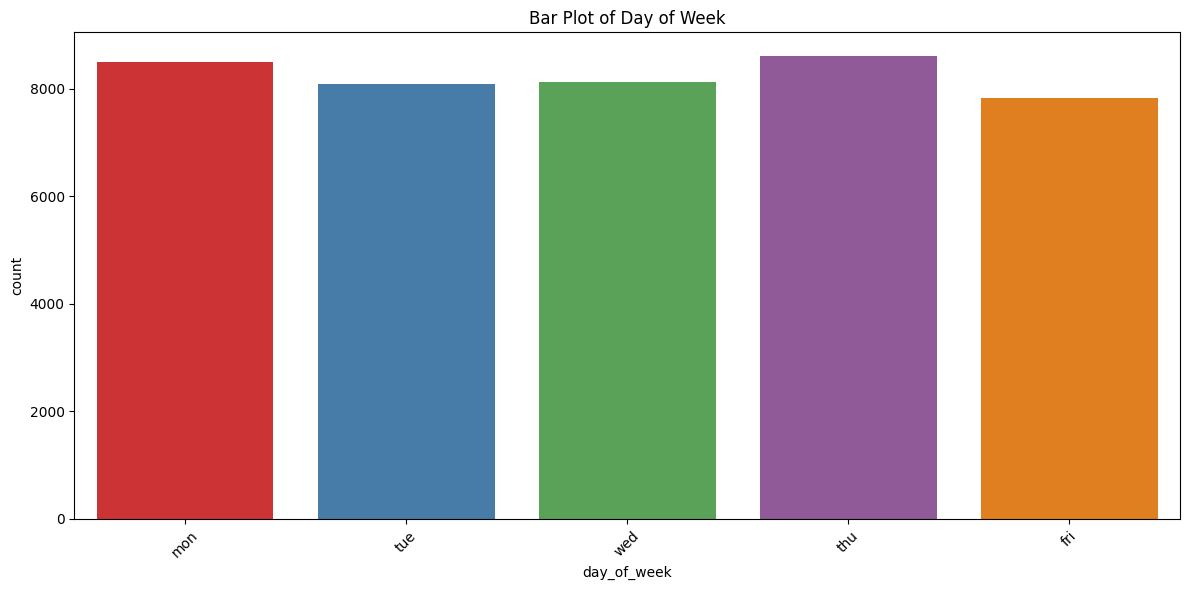

In [46]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='day_of_week', data=tele_df, palette='Set1')  
plt.title('Bar Plot of Day of Week')  
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

In [17]:
#log Transformation based on skewness of the data in campaign and duration
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [23]:
log_transform(tele_df,['age','duration','campaign'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

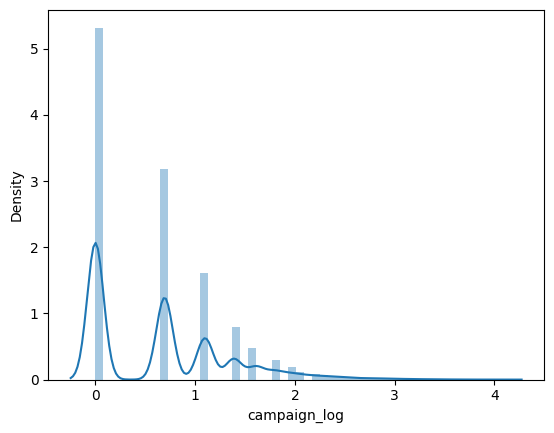

In [58]:
#Log transformation of the feature 'campaign_log'
sns.distplot(tele_df["campaign_log"], axlabel="campaign_log");
plt.show()

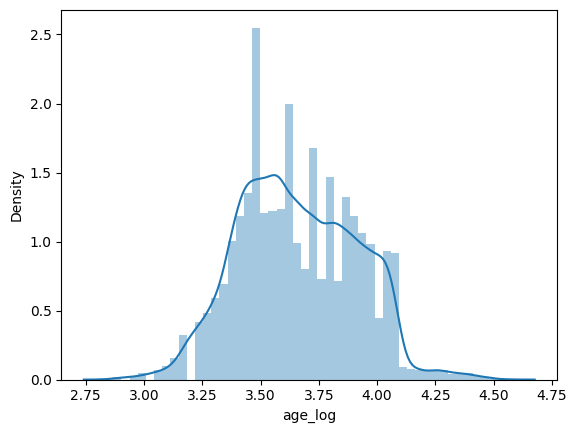

In [59]:
#Log transformation of the feature 'age_log'
sns.distplot(tele_df["age_log"], axlabel="age_log");
plt.show()

<Figure size 1300x1700 with 0 Axes>

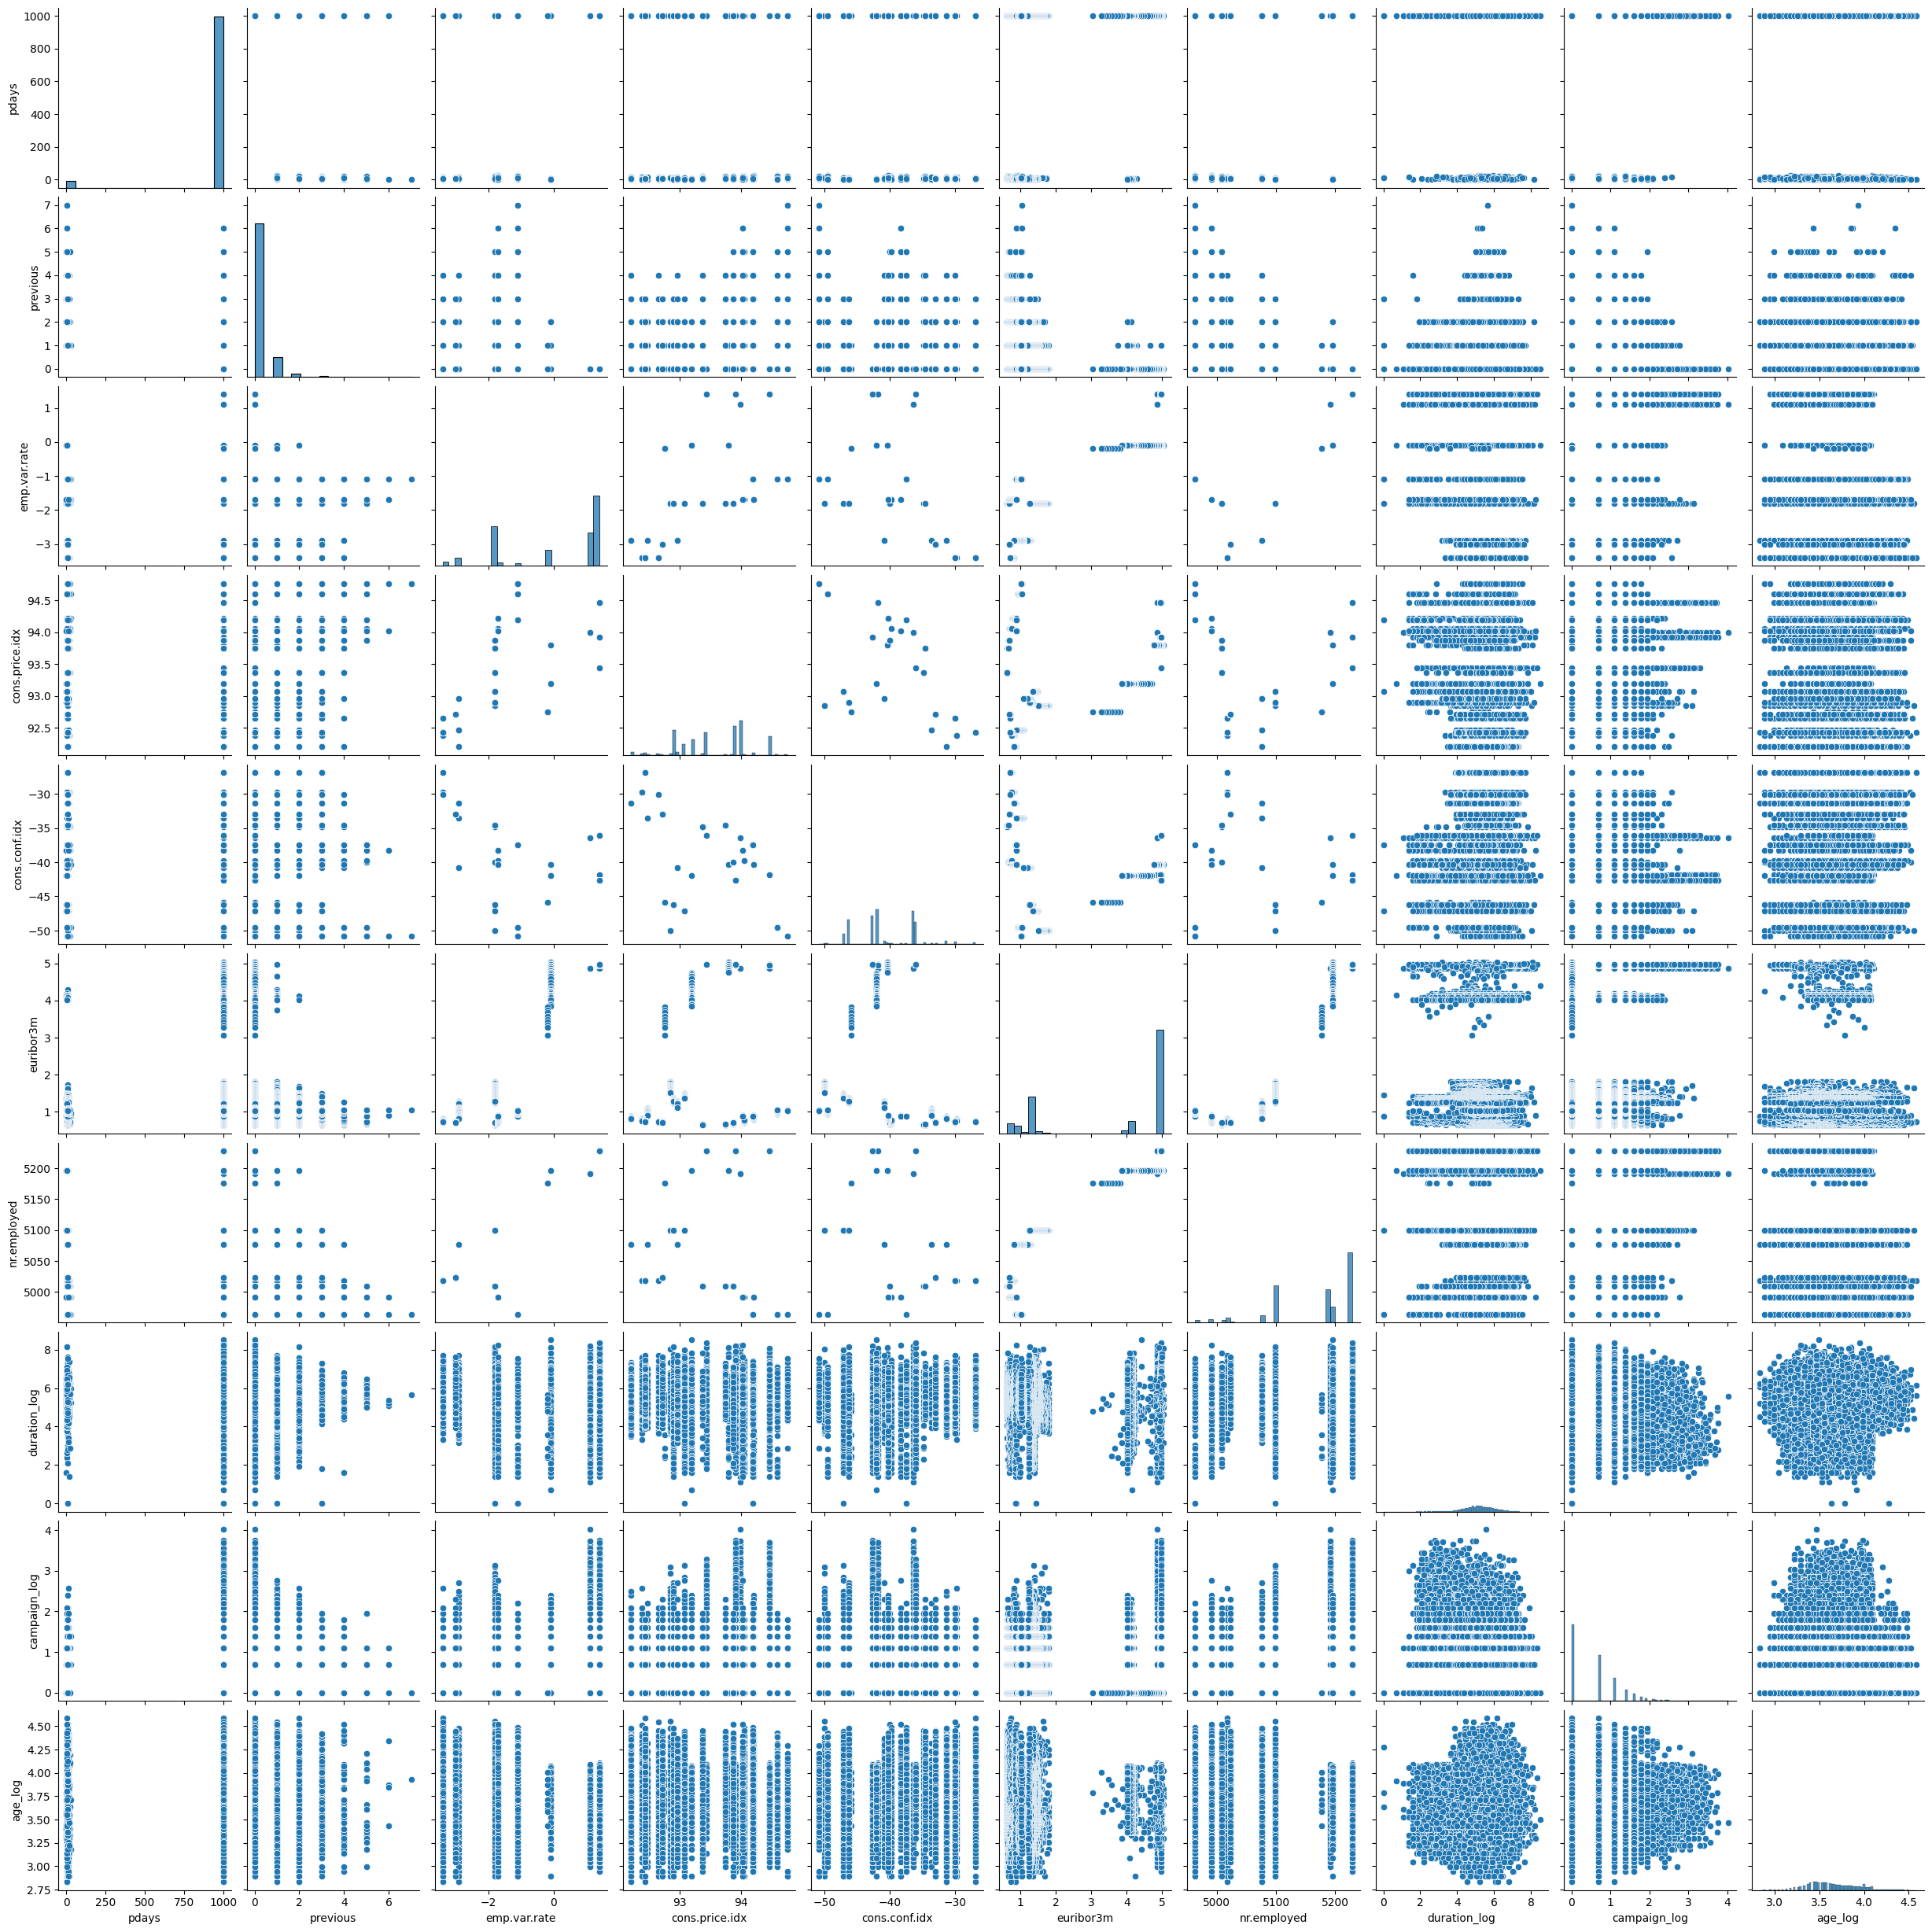

In [60]:
plt.figure(figsize=(13,17))
sns.pairplot(data=tele_df.drop(['age','campaign','duration'],axis=1))
plt.show()

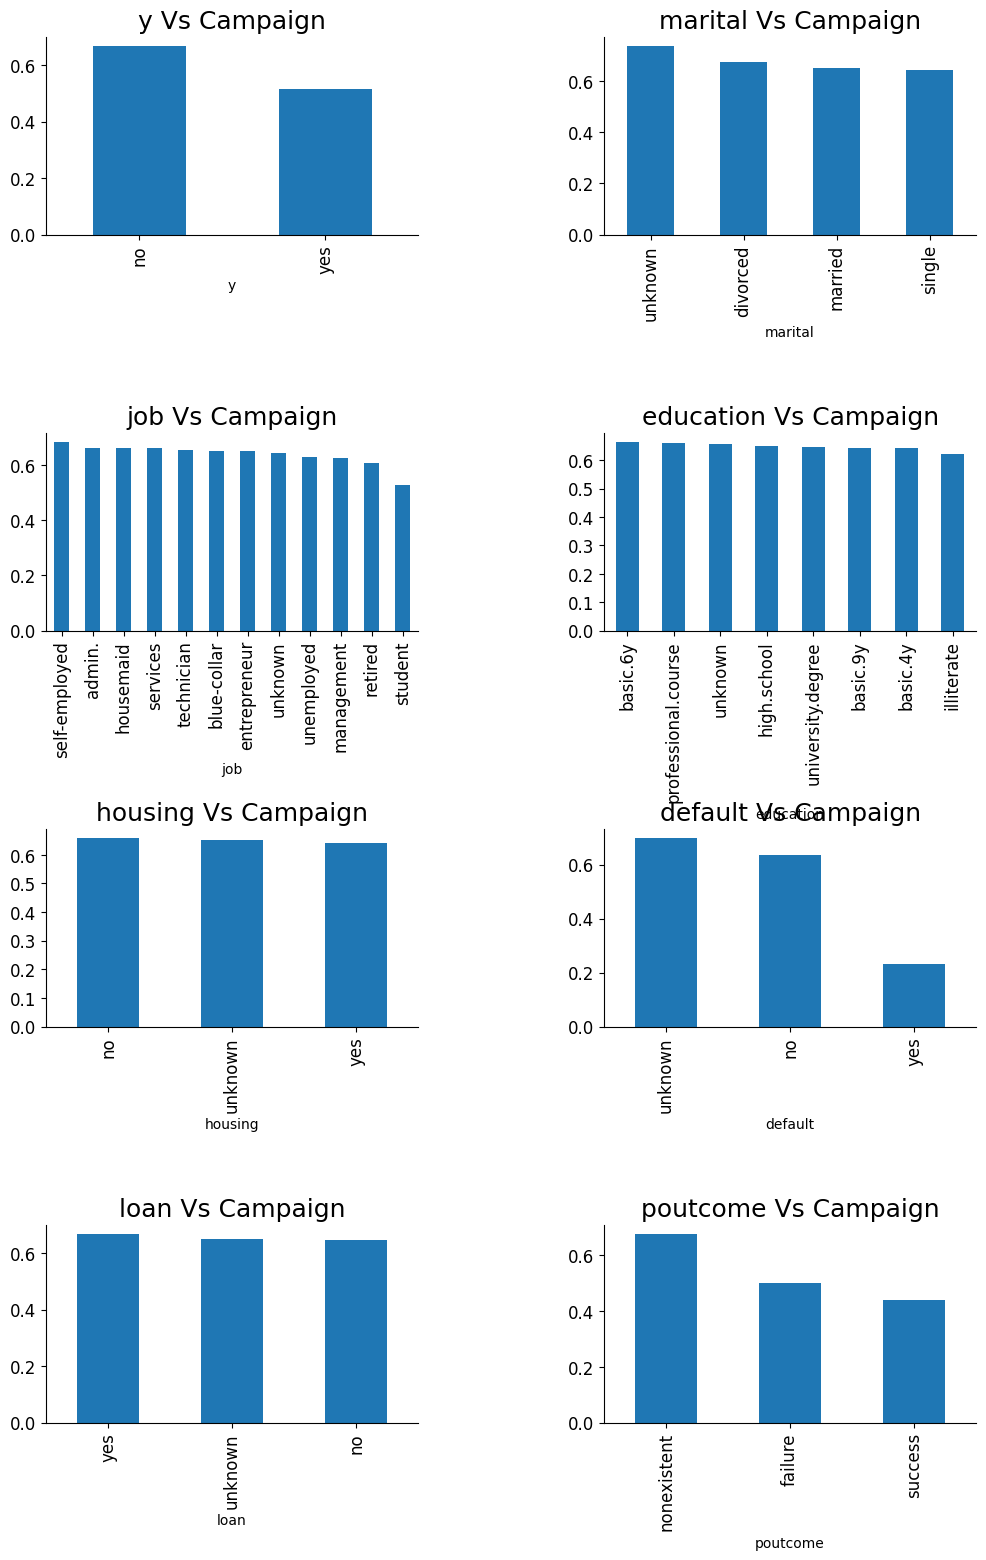

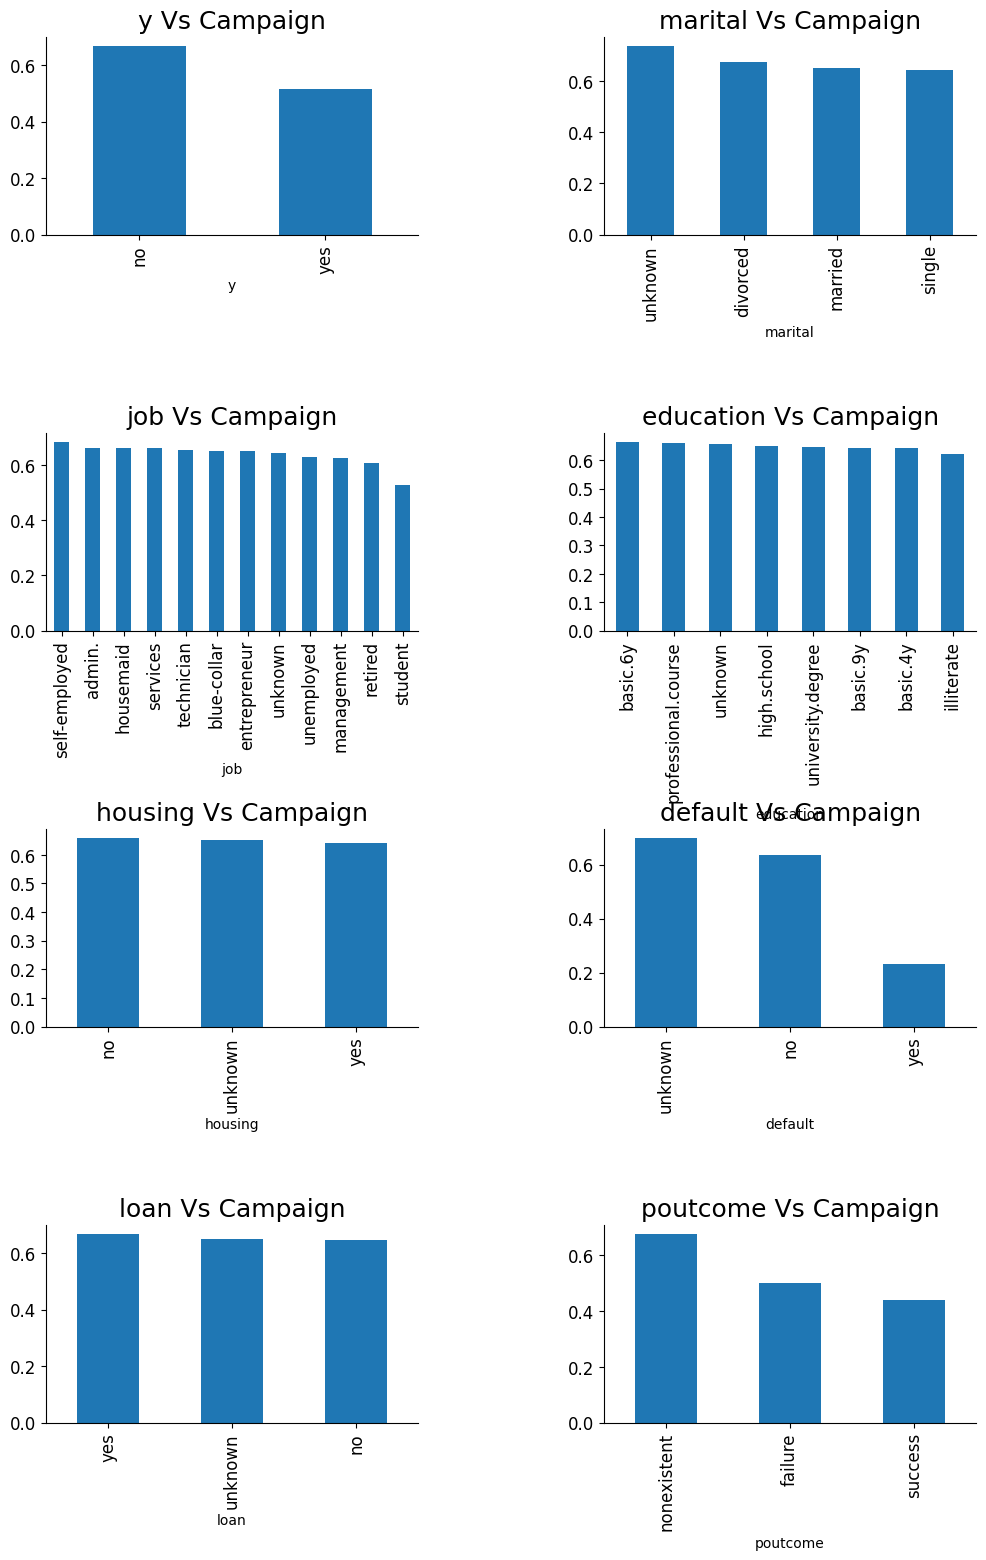

<Figure size 1000x600 with 0 Axes>

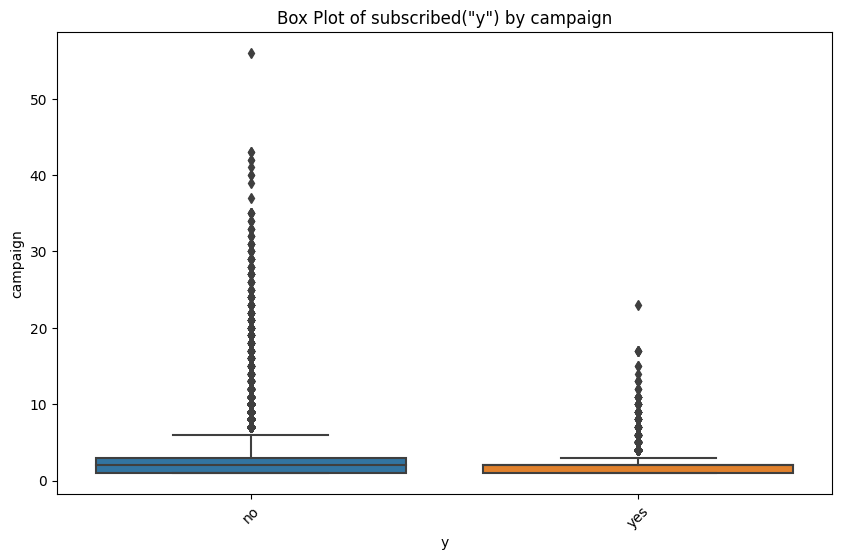

In [64]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('y')['age_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Subscription Vs Age", fontsize=18)
data.groupby('Marital')['age_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Marital Vs Age", fontsize=18)
data.groupby('job')['age_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()
plt.show()

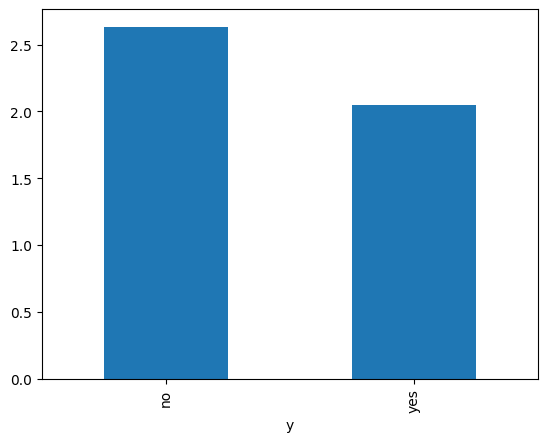

In [27]:
tele_df.groupby('y')['campaign'].mean().sort_values(ascending=False).plot.bar()
# plt.set_title("Subscription Vs Age", fontsize=18)
plt.show()

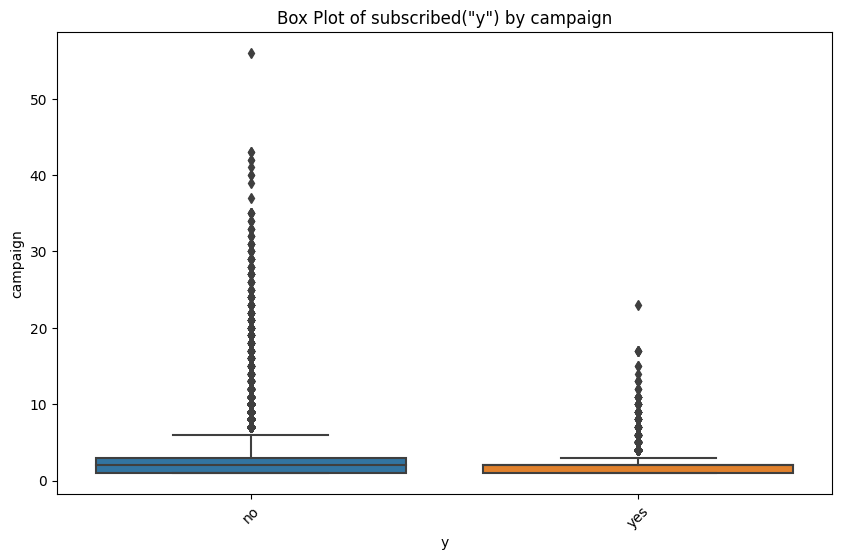

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="y", y="campaign", data=tele_df)
plt.title(f'Box Plot of subscribed("y") by campaign')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()